
# 10分钟快速上手飞桨

从完成一个简单的『手写数字识别任务』开始，可快速了解深度学习模型开发的大致流程，并初步掌握飞桨框架 API 的使用方法。

## 一、快速安装飞桨

如果已经安装好飞桨那么可以跳过此步骤。飞桨支持很多种安装方式，这里介绍其中一种简单的安装命令：


In [1]:
# 使用 pip 工具安装飞桨 CPU 版
! python3 -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


该命令用于安装 CPU 版本的飞桨，如果要安装其他计算平台或操作系统支持的版本，可点击 [ 快速安装]( <https://www.paddlepaddle.org.cn/install/quick>)  查看安装引导。

### 二、导入飞桨

安装完成后，需要在Python解释器中使用 import 导入飞桨，即可开始实践深度学习任务。

若操作成功，会输出飞桨的版本号。

In [6]:
import paddle    
print(paddle.__version__)

2.2.1




## 三、实践：手写数字识别任务

『手写数字识别』是深度学习里的 Hello World 任务，用于对 0 ~ 9 的十类数字进行分类，即输入手写数字的图片，可识别出这个图片中的数字。

本任务用到的数据集为 [MNIST 手写数字数据集](http://yann.lecun.com/exdb/mnist/)，用于训练和测试模型。该数据集包含 60000 张训练图片、 10000 张测试图片、以及对应的分类标签文件，每张图片上是一个 0 ~ 9 的手写数字，分辨率为 28 * 28。部分图像和对应的分类标签如下图所示。

<center><img src="images/mnist.png" width="600"></center>
<center><br>图1：MNIST数据集样例</br></center>

开始之前，需要使用下面的命令安装 Python 的 matplotlib 库和 numpy 库，matplotlib 库用于可视化图片，numpy 库用于处理数据。

In [2]:
# 使用 pip 工具安装 matplotlib 和 numpy
! python3 -m pip install matplotlib numpy -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


下面是手写数字识别任务的完整代码，如果想直接运行代码，可以拷贝下面的完整代码到一个Python文件中运行。

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0414 - acc: 0.9518 - 20ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0219 - acc: 0.9801 - 20ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0156 - acc: 0.9834 - 19ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0021 - acc: 0.9866 - 20ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0165 - acc: 0.9884 - 19ms/step          
Eval begin...
step 10000/10000 [==============================] - loss: 1.0729e-06 - acc: 0.9850 - 2ms/step          
Eval samples: 10000
true label: 7, pred label: 7


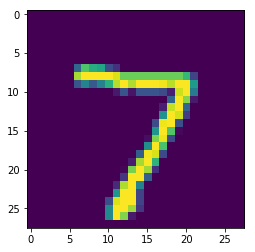

In [3]:
import paddle
import numpy as np
from paddle.vision.transforms import ToTensor

# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=ToTensor())
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=ToTensor())

# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)
# 模型评估
model.evaluate(test_dataset, verbose=1)

# 保存模型
model.save('./output/mnist')
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片并将图片shape变为1*1*28*28
img, label = test_dataset[0]
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

以上代码使用 MNIST 数据集训练并测试了 LeNet 模型，并最终成功推理出了一张手写数字图片的标签，该图片推理结果是 7 （ pred label: 7），真实标签也是7 （true label: 7）。

简单地说，深度学习任务一般分为以下几个核心步骤：


1. 数据集定义与加载
2. 模型组网
3. 模型训练和评估
4. 模型推理

接下来逐个步骤介绍，帮助你快速掌握使用飞桨框架实践深度学习任务的方法。


###  3.1 数据集定义与加载

飞桨在 [paddle.vision.datasets](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/vision/Overview_cn.html#api) 下内置了计算机视觉（Computer Vision，CV）领域常见的数据集，如 MNIST、Cifar10、Cifar100、FashionMNIST 和 VOC2012 等。在本任务中，先后加载了 MNIST 训练集（`mode='train'`）和测试集（`mode='test'`），训练集用于训练模型，测试集用于评估模型效果。

MNIST 数据集是图像格式文件，而深度学习模型通常不能直接用图像格式的数据进行训练，需要转换为模型支持的数据格式，因此本任务中还导入了 [paddle.vision.transforms](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/vision/Overview_cn.html#about-transforms) 模块，在初始化 MNIST 数据集时传入了 `ToTensor` 变换来将图像转换为飞桨支持的 Tensor 数据类型。


In [2]:
import paddle
from paddle.vision.transforms import ToTensor

# 下载数据集并初始化DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=ToTensor())
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=ToTensor())
# 打印数据集里图片数量
print('{} images in train_dataset, {} images in test_dataset'.format(len(train_dataset), len(test_dataset)))

item   48/2421 [..............................] - ETA: 5s - 2ms/item

Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-images-idx3-ubyte.gz 
Begin to download


item 8/8 [============================>.] - ETA: 0s - 2ms/item


Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/train-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/train-labels-idx1-ubyte.gz 
Begin to download

Download finished


item  39/403 [=>............................] - ETA: 1s - 3ms/item

Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-images-idx3-ubyte.gz 
Begin to download


item 2/2 [===========================>..] - ETA: 0s - 2ms/item


Download finished
Cache file /home/aistudio/.cache/paddle/dataset/mnist/t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-labels-idx1-ubyte.gz 
Begin to download

Download finished


60000 images in train_dataset, 10000 images in test_dataset


飞桨除了内置了 CV 领域常见的数据集，还在 [paddle.text.datasets](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/text/Overview_cn.html#api) 下内置了自然语言处理（Natural Language Processing，NLP）领域常见的数据集，并提供了自定义数据集与加载的 [paddle.io.Dataset](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/Dataset_cn.html#dataset) 和 [paddle.io.DataLoader](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/io/DataLoader_cn.html#dataloader) API，详细使用方法可参考『数据集定义与加载』 章节。

在 `paddle.vision.transforms` 模块中还内置了很多数据增广的 API，如对图像进行中心裁剪、水平翻转和图像归一化等操作，以增加训练样本的多样性，提升模型的泛化能力，详细使用方法可参考『数据预处理』 章节。

更多参考：
* [数据集定义与加载](02_data_load_cn.html)
* [数据预处理](03_data_preprocessing_cn.html)


###  3.2 模型组网

飞桨的模型组网有多种方式，既可以直接使用飞桨内置的模型，也可以自定义组网。


『手写数字识别任务』比较简单，普通的神经网络就能达到很高的精度，在本任务中使用了飞桨内置的 LeNet 作为模型。飞桨在 [paddle.vision.models](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/vision/Overview_cn.html#about-models) 下内置了 CV 领域的一些经典模型，LeNet 就是其中之一，调用很方便，只需一行代码即可完成 LeNet 的网络构建和初始化。`num_classes` 字段中定义分类的类别数，因为需要对 0 ~ 9 的十类数字进行分类，所以设置为10。

另外通过 [paddle.summary](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/summary_cn.html#summary) 可方便地打印网络的基础结构和参数信息。

In [9]:
# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)

# 可视化模型组网结构和参数
params_info = paddle.summary(lenet,(1, 1, 28, 28))
print(params_info)

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-13      [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-13       [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
 MaxPool2D-13     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-14      [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-14      [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
 MaxPool2D-14    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Linear-19         [[1, 400]]            [1, 120]           48,120     
   Linear-20         [[1, 120]]            [1, 84]            10,164     
   Linear-21         [[1, 84]]             [1, 10]              850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

通过飞桨的 [paddle.nn.Sequential](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/nn/Sequential_cn.html) 和 [paddle.nn.Layer](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/nn/Layer_cn.html) API 可以更灵活方便的组建自定义的神经网络，详细使用方法可参考『模型组网』章节。

更多参考：
* [模型组网](04_model_cn.html)

### 3.3 模型训练评估

#### 3.3.1 模型训练

模型训练需完成如下步骤：

1. **使用 [paddle.Model](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html) 封装模型。**  将网络结构组合成可快速使用[飞桨高层 API ](http://)进行训练、评估、推理的实例，方便后续操作。
2. **使用 [paddle.Model.prepare](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#prepare-optimizer-none-loss-none-metrics-none-amp-configs-none) 完成训练的配置准备工作。**  包括损失函数、优化器和评价指标等。飞桨在 [paddle.optimizer](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/optimizer/Overview_cn.html#api) 下提供了优化器算法相关 API，在 [paddle.nn](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/nn/Overview_cn.html#loss) 下提供了损失函数相关 API，在 [paddle.metric](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/metric/Overview_cn.html) 下提供了评价指标相关 API。
3. **使用 [paddle.Model.fit](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#fit-train-data-none-eval-data-none-batch-size-1-epochs-1-eval-freq-1-log-freq-10-save-dir-none-save-freq-1-verbose-2-drop-last-false-shuffle-true-num-workers-0-callbacks-none) 配置循环参数并启动训练。**  配置参数包括指定训练的数据源 `train_dataset`、训练的批大小 `batch_size`、训练轮数 `epochs` 等，执行后将自动完成模型的训练循环。


因为是分类任务，这里损失函数使用常见的 [CrossEntropyLoss](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/nn/CrossEntropyLoss_cn.html#crossentropyloss) （交叉熵损失函数），优化器使用常见的 [Adam](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/optimizer/Adam_cn.html#adam) 优化器，使用 [Accuracy](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/metric/Accuracy_cn.html#accuracy) （精度）指标来计算模型在训练集上的精度。

In [3]:
# 封装模型，便于进行后续的训练、评估和推理
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 开始训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:77: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(seq, collections.Sequence) and


step 938/938 [==============================] - loss: 0.1031 - acc: 0.9476 - 20ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0154 - acc: 0.9794 - 20ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0077 - acc: 0.9837 - 20ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 0.0113 - acc: 0.9860 - 21ms/step          
Epoch 5/5
step 938/938 [==============================] - loss: 0.0537 - acc: 0.9874 - 21ms/step          


从训练过程的打印日志中，可观察到损失函数值 loss 逐渐变小，精度 acc 逐渐上升的趋势，反映出不错的训练效果。

#### 3.3.2 模型评估

模型训练完成之后，调用 [paddle.Model.evaluate](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#evaluate-eval-data-batch-size-1-log-freq-10-verbose-2-num-workers-0-callbacks-none) ，使用预先定义的测试数据集，来评估训练好的模型效果，评估完成后将输出模型在测试集上的损失函数值 loss 和精度 acc。


In [8]:
# 进行模型评估
model.evaluate(test_dataset, verbose=1)

Eval begin...
step 10000/10000 [==============================] - loss: 1.1921e-07 - acc: 0.9800 - 2ms/step          - loss: 0
Eval samples: 10000


{'loss': [1.1920929e-07], 'acc': 0.98}

从结果可以看到，初步训练得到的模型精度在98%附近，在逐渐熟悉深度学习模型开发和训练技巧后，可以通过调整其中的训练参数来进一步提升模型的精度。

更多参考：
* [模型训练与评估](http://)xxxxxxx

### 3.4 模型推理



#### 3.4.1 模型保存

模型训练完成后，通常需要将训练好的模型参数和优化器等信息，持久化保存到参数文件中，便于后续执行推理验证。

在飞桨中可通过调用 [paddle.Model.save](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#save-path-training-true) 保存模型。代码示例如下，其中 output 为模型保存的文件夹名称，minst 为保存的模型文件名称。

In [5]:
# 保存模型，文件夹会自动创建
model.save('./output/mnist')

以上代码执行后会在`output`目录下保存两个文件，`mnist.pdopt`为优化器的参数，`mnist.pdparams`为模型的参数
```bash
output
├── mnist.pdopt     # 优化器的参数
└── mnist.pdparams  # 模型的参数
```


#### 3.4.2 模型加载并执行推理

执行模型推理时，可调用 [paddle.Model.load](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#load-path-skip-mismatch-false-reset-optimizer-false) 加载模型，然后可通过调用 [paddle.Model.predict_batch](https://www.paddlepaddle.org.cn/documentation/docs/zh/api/paddle/Model_cn.html#predict-batch-inputs) 执行推理操作。

如下示例中，针对前面创建的 `model` 实例加载保存的参数文件 `output/mnist`，并选择测试集中的一张图片 `test_dataset[0]` 作为输入，执行推理并打印结果，可以看到推理的结果与可视化图片一致。


true label: 7, pred label: 7


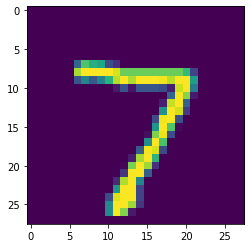

In [10]:
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片并将图片shape变为1*1*28*28
img, label = test_dataset[0]
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])

更多参考：
* [模型保存与加载](http://)xxxxxxx
* [模型推理](http://)xxxxxxx

## 四、总结

至此通过飞桨几个简单的API完成了一个深度学习任务，总结整个流程和用到的关键 API 如下图所示。

<center><img src="images/model_develop_flow.png" width="600"></center>
<center><br>图1：模型开发流程</br></center>

如果想要完成更复杂的深度学习任务，开发更强大的模型，飞桨提供了功能丰富的 API 帮助开发者完成任务，比如对数据集应用数据增广、使用更大的 CNN 模型、自定义神经网络、调优性能等，同时飞桨官网提供了丰富的教程与案例可供参考，欢迎一起探索深度学习的世界。